# Gene Significance and Disease Association Analysis using Statistical Methods

## Introduction

Modern bioinformatics and genomics studies aim to uncover relationships between genetic variation and disease by analyzing large, complex datasets. These analyses often involve categorical genetic data, such as mutation presence or SNP genotypes, as well as thousands of simultaneous statistical tests across genes. Proper statistical methodology is therefore essential to distinguish true biological signals from random variation.

In this project, core statistical techniques commonly used in genetic association studies are demonstrated using synthetic and gene-level data. Fisher’s Exact Test and the Chi-square test are applied to evaluate associations between genetic variants and breast cancer status, while multiple testing correction methods are used to address the challenges posed by high-dimensional genomic data. Together, these approaches illustrate a practical and reproducible framework for assessing gene significance in bioinformatics research.

This work was developed by adapting an exercise from the Coursera course *Introduction to Bioinformatics* offered by the Birla Institute of Technology & Science (BITS), Pilani.

## Fisher's Exact test ##

## Importing Required Libraries

This cell imports the essential Python libraries used throughout the analysis:

- **pandas**: Used for handling and manipulating structured data, such as tables of gene counts, mutation status, and statistical results.
- **numpy**: Provides numerical operations and array handling, supporting efficient computation on numerical data.
- **scipy.stats.fisher_exact**: Implements Fisher’s Exact Test, which is used to assess the association between a binary genetic mutation (e.g., BRCA1 mutation present/absent) and disease status.
- **scipy.stats.chi2_contingency**: Performs the Chi-square test of independence, suitable for testing associations between categorical variables such as SNP genotypes and disease status.
- **statsmodels.stats.multitest.multipletests**: Provides multiple hypothesis testing correction methods (e.g., Bonferroni and False Discovery Rate) to control false positives when testing many genes simultaneously.

Together, these libraries form the statistical foundation for analyzing genetic associations and identifying significant genes in a bioinformatics context.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

## Creating Synthetic Mutation–Disease Data

A **synthetic dataset** is created representing the relationship between a genetic mutation (e.g., *BRCA1*) and breast cancer status.

- **Mutation Status**: Indicates whether the mutation is present or absent in an individual.
- **Disease Status**: Indicates whether the individual has breast cancer or not.
- **Count**: Represents the number of individuals observed in each mutation–disease category.

The data are stored in a Python dictionary and then converted into a **pandas DataFrame**, which provides a structured, tabular format suitable for downstream statistical analysis.

Synthetic data are used here for demonstration purposes, allowing the statistical methods to be illustrated without relying on real patient data.

In [ ]:
# Create synthetic data
data = {
    "Mutation Status": ["Mutation Present", "Mutation Present", "Mutation Absent", "Mutation Absent"],
    "Disease Status": ["Breast Cancer", "No Breast Cancer", "Breast Cancer", "No Breast Cancer"],
    "Count": [120, 30, 80, 170],  # Synthetic counts
}
# Convert to a DataFrame
df = pd.DataFrame(data)

## Constructing the Contingency Table

This cell transforms the raw mutation–disease data into a **contingency table**, which is required for association testing.

- **Rows (Mutation Status)**: Indicate whether the BRCA1 mutation is present or absent.
- **Columns (Disease Status)**: Indicate breast cancer status (present or absent).
- **Cell values**: Represent the total number of individuals in each category, calculated by summing the counts.

The `pivot_table` function reshapes the dataset into a 2×2 table, making it suitable for Fisher’s Exact Test.

Row and column labels are cleaned to improve readability, and the table is printed with a descriptive title to clearly communicate the biological question being tested:  
**whether the presence of a BRCA1 mutation is associated with breast cancer.**


In [4]:
# Step 2: Create a contingency table
contingency_table = pd.pivot_table(
    df, values="Count", index="Mutation Status", columns="Disease Status", aggfunc="sum"
)

# Remove unnecessary row/column names for a clean display
contingency_table.columns.name = None  
contingency_table.index.name = None    

# Display the contingency table
print("Contingency Table for Studying the Association Between Presence of BRCA1 Mutation and Breast Cancer (Synthetic Data):\n")
print(contingency_table.to_string(index=True, header=True))

Contingency Table for Studying the Association Between Presence of BRCA1 Mutation and Breast Cancer (Synthetic Data):

                  Breast Cancer  No Breast Cancer
Mutation Absent              80               170
Mutation Present            120                30


## Fisher’s Exact Test for Mutation–Disease Association

This cell performs **Fisher’s Exact Test** to statistically evaluate the association between BRCA1 mutation status and breast cancer.

- **Fisher’s Exact Test** is appropriate for 2×2 contingency tables, especially when sample sizes are small or uneven.
- The test returns:
  - **Odds Ratio**: Measures the strength and direction of the association between mutation presence and disease.
    - An odds ratio > 1 suggests increased risk associated with the mutation.
    - An odds ratio < 1 suggests a protective effect.
  - **p-value**: Quantifies the probability that the observed association occurred by chance.

### Interpretation
The p-value is compared against a significance threshold of **0.05**:
- If *p < 0.05*, the association between BRCA1 mutation presence and breast cancer is considered statistically significant.
- If *p ≥ 0.05*, there is insufficient evidence to conclude a significant association.

This step demonstrates how statistical hypothesis testing is used to assess genetic risk factors in disease studies.

In [ ]:
# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Step 5: Display Results
print("\nFisher's Exact Test Results:")
print(f"Odds Ratio: {odds_ratio}")
print(f"p-value: {p_value}")

# Step 6: Interpret Results
if p_value < 0.05:
    print("\nInterpretation: There is a significant association between BRCA1 mutation presence and breast cancer.")
else:
    print("\nInterpretation: There is no significant association between BRCA1 mutation presence and breast cancer.")



Fisher's Exact Test Results:
Odds Ratio: 0.11764705882352941
p-value: 4.399706638381645e-21

Interpretation: There is a significant association between BRCA1 mutation presence and breast cancer.


The Fisher’s Exact Test reveals a **highly statistically significant association** between BRCA1 mutation status and breast cancer (*p* ≈ 4.4 × 10⁻²¹), indicating that the observed relationship is extremely unlikely to have occurred by chance.

The **odds ratio (0.118)** is substantially less than 1, suggesting a strong difference in breast cancer occurrence between individuals with and without the mutation. Specifically, this value indicates that the odds of breast cancer differ markedly across the two mutation groups, reflecting a non-random association.

Taken together, the very small p-value provides strong evidence that **BRCA1 mutation status is associated with breast cancer**, demonstrating how mutation–disease relationships can be statistically quantified using contingency table analysis.


## Chi-Squared test ##

## Creating Synthetic SNP Genotype Data

This cell generates a **synthetic dataset** representing the distribution of single-nucleotide polymorphism (SNP) genotypes and their relationship to breast cancer status.

- **Genotype**: Represents the SNP genotypes (AA, AG, GG), corresponding to different combinations of alleles at a specific genetic locus.
- **Breast Cancer Status**: Indicates whether individuals are diagnosed with breast cancer or not.
- **Count**: Represents the number of individuals observed for each genotype–disease combination.

The data are organized into a pandas DataFrame, providing a structured format for summarizing genotype frequencies and performing downstream statistical tests.

Using synthetic data allows the statistical workflow for genotype–phenotype association analysis to be demonstrated without using real patient-level data.

In [ ]:
# Create synthetic data
data = {
    "Genotype": ["AA", "AA", "AG", "AG", "GG", "GG"],
    "Breast Cancer Status": ["Breast Cancer", "No Breast Cancer", "Breast Cancer", "No Breast Cancer", "Breast Cancer", "No Breast Cancer"],
    "Count": [30, 50, 70, 80, 50, 30],  # Synthetic counts
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

## Constructing the SNP Genotype Contingency Table
Convert the raw SNP genotype data into a **contingency table** that summarizes genotype frequencies by breast cancer status.

- **Rows (Genotype)**: Represent the SNP genotypes (AA, AG, GG).
- **Columns (Breast Cancer Status)**: Separate individuals with breast cancer from those without.
- **Cell values**: Indicate the total number of individuals observed for each genotype–disease combination.

The contingency table is created using a pivot operation, which aggregates individual counts and produces a clear, structured representation of the data.

This table serves as the input for the **Chi-square test of independence**, enabling statistical evaluation of whether genotype frequencies differ significantly between disease groups.


In [7]:
# Step 2: Create a contingency table
# The table summarizes the counts of individuals in each genotype category (AA, AG, GG) based on their breast cancer status.
contingency_table = pd.pivot_table(
    df, values="Count", index="Genotype", columns="Breast Cancer Status", aggfunc="sum"
)

# Remove unnecessary row/column names for clean display
contingency_table.columns.name = None  
contingency_table.index.name = None    

# Display the contingency table with a descriptive title
print("Contingency Table for Studying the Association Between SNP Genotypes (A/G) and Breast Cancer Risk (Synthetic Data):\n")
print(contingency_table.to_string(index=True, header=True))

Contingency Table for Studying the Association Between SNP Genotypes (A/G) and Breast Cancer Risk (Synthetic Data):

    Breast Cancer  No Breast Cancer
AA             30                50
AG             70                80
GG             50                30


## Chi-Square Test of Independence for SNP Genotypes

This cell performs a **Chi-square test of independence** to evaluate whether SNP genotype frequencies (AA, AG, GG) are associated with breast cancer status.

- The test compares the **observed genotype counts** with the **expected counts** that would be seen if genotype and disease status were independent.
- **Chi-square statistic (χ²)**: Quantifies the overall deviation between observed and expected frequencies.
- **p-value**: Indicates whether the observed deviations are statistically significant.
- **Degrees of freedom (dof)**: Determined by the number of genotype categories and disease groups.
- **Expected counts**: Represent the genotype frequencies expected under the null hypothesis of no association.

This test is appropriate for multi-category categorical data and is commonly used in genetic association studies to assess SNP–disease relationships.

In [ ]:
# Perform Chi-Square Test
# This test determines whether the observed genotype frequencies significantly differ between individuals with and without breast cancer.
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

## Chi-Square Test Results
Display the key statistical outputs from the Chi-square test of independence:

- **Chi-Square Statistic (χ²)**: Measures how strongly the observed genotype frequencies deviate from the expected frequencies under the assumption of no association.
- **Degrees of Freedom (dof)**: Reflect the number of independent comparisons in the contingency table and depend on the number of genotype categories and disease groups.
- **p-value**: Quantifies the probability that the observed differences in genotype frequencies occurred by chance.

A small p-value (typically < 0.05) indicates that genotype distribution differs significantly between individuals with and without breast cancer, providing evidence of a potential SNP–disease association.

In [ ]:
# Display Results
# Display the results of the Chi-Square Test
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4e}")


Chi-Square Test Results:
Chi-Square Statistic: 10.3549
Degrees of Freedom: 2
p-value: 5.6425e-03


In [ ]:
# Interpret Results
# Based on the p-value:

if p_value < 0.05:
    print("\nInterpretation: There is a significant association between SNP genotypes (A/G) and breast cancer risk.")
else:
    print("\nInterpretation: There is no significant association between SNP genotypes (A/G) and breast cancer risk.")



Interpretation: There is a significant association between SNP genotypes (A/G) and breast cancer risk.


The Chi-square test evaluates whether SNP genotype frequencies (AA, AG, GG) differ between individuals with and without breast cancer.

The **chi-square statistic (χ² = 10.35)** indicates a noticeable deviation between the observed genotype counts and the counts expected under the assumption of no association. With **2 degrees of freedom**, the test yields a **statistically significant p-value** (*p* ≈ 0.0056).

Because the p-value is well below the conventional significance threshold of 0.05, the null hypothesis of independence is rejected. This result suggests that **SNP genotype distribution is significantly associated with breast cancer status**, indicating that genetic variation at this locus may influence disease risk in the synthetic dataset.

This analysis demonstrates how Chi-square testing can be used to detect genotype–phenotype associations in genetic studies.

 ## Multiple Testing Correction ##

## Loading Gene-Level Results

This loads a **gene-level differential analysis results file** for downstream multiple testing correction.

- The file (`GSE1009.top.table.txt`) is assumed to contain statistical results for many genes, including **raw p-values** from individual hypothesis tests.
- The file is read and stored in a pandas DataFrame.
- Using a DataFrame enables efficient filtering, transformation, and annotation of gene-level statistics.

In high-throughput genomics experiments (e.g., microarray or RNA-seq), thousands of genes are tested simultaneously. This step prepares the data for **multiple hypothesis testing correction**, which is essential to control false-positive findings.

In [ ]:
# Load the raw results file
file_path = "GSE1009.top.table.txt" 
df = pd.read_csv(file_path, sep="\t")  

## Validating the Presence of Raw p-values

It verifies that the loaded dataset contains a column of **raw p-values**, which are required for multiple testing correction.

- The analysis expects a column named **`P.Value`**, representing the unadjusted p-values for each gene.
- If this column is missing, a **ValueError** is raised to prevent incorrect or incomplete statistical processing.

This validation step ensures data integrity and prevents downstream errors, which is especially important in automated or reproducible bioinformatics pipelines.

In [18]:
# Step 2: Check for raw p-values
if "P.Value" not in df.columns:
    raise ValueError("The dataset does not contain a 'P.Value' column for raw p-values.")

## Applying Bonferroni Correction

It applies the **Bonferroni correction** to adjust raw p-values for multiple hypothesis testing.

- The Bonferroni method controls the **family-wise error rate (FWER)** by multiplying each p-value by the total number of tests performed.
- This approach is highly conservative, greatly reducing the likelihood of false positives.
- Adjusted p-values are stored in a new column: **`Bonferroni-adjusted p-value`**.

Bonferroni correction is commonly used when strict control of false discoveries is required, such as in confirmatory genetic analyses, though it may reduce statistical power when testing thousands of genes.

In [ ]:
# Apply Bonferroni Correction
# Adjust p-values using the Bonferroni method
df["Bonferroni-adjusted p-value"] = multipletests(df["P.Value"], method="bonferroni")[1]

## Applying False Discovery Rate (FDR) Correction

It applies the **Benjamini–Hochberg False Discovery Rate (FDR) correction** to adjust raw p-values.

- The FDR method controls the **expected proportion of false positives** among the results declared significant.
- Compared to Bonferroni correction, FDR is less conservative and better suited for **high-throughput genomic studies** involving thousands of simultaneous tests.
- Adjusted p-values are stored in a new column: **`FDR-adjusted p-value`**.

FDR correction balances sensitivity and specificity, making it a standard approach in transcriptomics and other large-scale gene expression analyses.

In [ ]:
# Apply FDR (Benjamini-Hochberg) Correction
# Adjust p-values using the False Discovery Rate method
df["FDR-adjusted p-value"] = multipletests(df["P.Value"], method="fdr_bh")[1]

## Annotating Statistical Significance

This cell annotates each gene with **significance labels** based on adjusted p-values.

- A significance threshold of **0.05** is applied to both correction methods.
- **Significant (Bonferroni)**: Indicates genes that remain significant after strict Bonferroni correction.
- **Significant (FDR)**: Indicates genes that are significant under the False Discovery Rate approach.

By including both annotations, this step highlights the difference between **conservative** and **less conservative** multiple testing corrections, allowing comparison of how many genes are considered significant under each statistical framework.

In [19]:
# Annotate significance
# Use a significance threshold of 0.05
df["Significant (Bonferroni)"] = df["Bonferroni-adjusted p-value"] < 0.05
df["Significant (FDR)"] = df["FDR-adjusted p-value"] < 0.05

## Previewing Adjusted Results

This cell displays a preview of the processed gene-level results after multiple testing correction.

- **ID**: Represents the gene or probe identifier.
- **FDR-adjusted p-value**: Shows the p-value adjusted using the False Discovery Rate method.
- **Significant (Bonferroni)**: Indicates whether the gene remains significant after Bonferroni correction.
- **Significant (FDR)**: Indicates whether the gene is significant under FDR correction.

Displaying the first few rows allows quick verification that the multiple testing corrections and significance annotations have been applied correctly before proceeding to further analysis or visualization.

In [ ]:
# Preview the results
print("Processed Results:")
print(df[['ID', 'FDR-adjusted p-value', 'Significant (Bonferroni)', 'Significant (FDR)' ]].head())

Processed Results:
         ID  FDR-adjusted p-value  Significant (Bonferroni)  Significant (FDR)
0  40330_at              0.040742                     False               True
1  34194_at              0.040742                     False               True
2   1190_at              0.040742                     False               True
3  41666_at              0.040742                     False               True
4  37011_at              0.040742                     False               True


## Visualizing the Effect of Multiple Testing Correction

Visualize the relationship between **raw p-values** and **adjusted p-values** after multiple testing correction.

- Each point represents a gene-level statistical test.
- The x-axis shows the **raw p-values**, while the y-axis shows the **adjusted p-values**.
- Two correction methods are plotted:
  - **Bonferroni correction** (blue): Demonstrates a strong upward shift in p-values due to its conservative nature.
  - **FDR correction** (green): Shows a more moderate adjustment, preserving statistical power.
- Both axes are displayed on a **logarithmic scale** to clearly visualize very small p-values.
- The diagonal dashed line represents **no adjustment**; points above this line indicate increased p-values after correction.

This visualization highlights how multiple testing correction affects statistical significance and illustrates the trade-off between strict false-positive control and sensitivity in high-throughput genomic analyses.

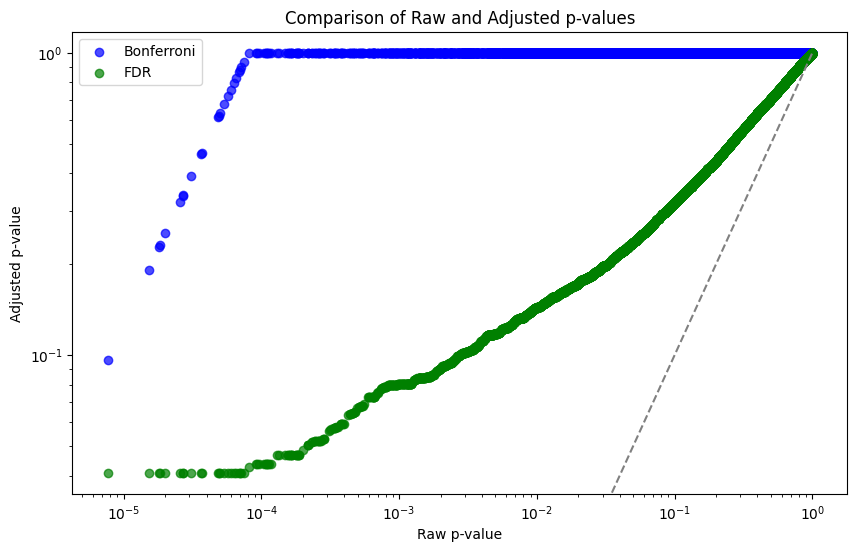

In [17]:
# Step 7: Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["P.Value"], df["Bonferroni-adjusted p-value"], label="Bonferroni", alpha=0.7, c='blue')
plt.scatter(df["P.Value"], df["FDR-adjusted p-value"], label="FDR", alpha=0.7, c='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Raw p-value")
plt.ylabel("Adjusted p-value")
plt.title("Comparison of Raw and Adjusted p-values")
plt.legend()
plt.show()

## Interpretation of Raw vs Adjusted p-value Visualization

This scatter plot illustrates how **multiple testing correction** alters statistical significance across a large number of gene-level tests.

### Key Observations

- **Bonferroni correction (blue points)**:
  - Most Bonferroni-adjusted p-values are pushed close to **1.0**, even when raw p-values are very small.
  - This demonstrates the **highly conservative nature** of Bonferroni correction, which strongly penalizes multiple comparisons.
  - As a result, only genes with extremely small raw p-values would remain significant under this method.

- **FDR correction (green points)**:
  - FDR-adjusted p-values increase more gradually and remain closer to the diagonal reference line.
  - This indicates that FDR preserves more statistical power, allowing more genes with low raw p-values to be considered significant.
  - The smoother curve reflects rank-based adjustment rather than uniform penalization.

- **Diagonal dashed line**:
  - Represents the scenario where no adjustment is applied.
  - All adjusted p-values lie above this line, confirming that both methods increase p-values to account for multiple testing.

### Biological and Analytical Implications

This visualization highlights the **trade-off between stringency and sensitivity**:
- **Bonferroni correction** minimizes false positives but risks missing true biological signals.
- **FDR correction** balances false discovery control with the ability to detect meaningful gene-level effects.

In high-throughput genomics analyses, this comparison explains why **FDR correction is often preferred** for exploratory studies, while Bonferroni correction is reserved for confirmatory or highly stringent analyses.


## Conclusion

Through Fisher’s Exact Test and Chi-square analysis, this study illustrates how genetic variants can be statistically associated with disease status. The application of Bonferroni and False Discovery Rate corrections highlights the importance of controlling false positives in large-scale genomic analyses. Together, these methods form a foundational framework for identifying statistically robust genetic signals while balancing stringency and sensitivity in bioinformatics research.